Features = Columnas

Tipo de Features

Datos atipicos = outliers

Registros = Filas

Dataframe = Tabla de datos


#Estimación y Metricas
##Media
###Media (mean):
Suma de todos los valores entre la cantidad de valores. Sensible a los datos.

###Media truncada (trimmed mean)
Se ignora un numero fijo de valres ordenados y se calcula el promedio de los restantes.

###Media ponderada (weighted mean)
Multiplica cada valor de x por su peso w, diviendo por la suma de las ponderaciones.


##Mediana
###Mediana (median)
Medida de estimación robusta ya que no se encuentra afectada por vaores atipicos (outliers). Valo central de una lista de valores ordenados de menor a mayor.

###Mediana ponderada (weighted median)
1. Ordenar los datos
2. Calcular la ponderación asociada.
3. Valor tal que la suma de las ponderaciones es igual para las mitades inferior y superior de la lista ordenada.

##Nube de datos

Asimetría negativa o a la izquierda: Media < Mediana < Moda

Simetrica: Media = Mediana = Moda

Asimetría positiva o a la derecha: Media > Mediana > Moda

#MEDIDAS DE TENDENCIA CENTRAL
1. Trabajando con dataframes.
2. Overview de los datos.
3. Obtener las medidas centrales.
4. Analizar graficas.

In [11]:
!pip install statsmodels

In [12]:
!pip install wquantiles

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

##1. Trabajando con dataframes

In [14]:
estado = pd.read_csv("/content/state.csv")

In [15]:
# Ver primeros 5 registros:
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [16]:
estado["Murder.Rate"].head()

,Murder.Rate
0,5.7
1,5.6
2,4.7
3,5.6
4,4.4


In [17]:
# Ver los 5 ultimos registros
estado.tail(5)

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [18]:
# Ver 5 registros al azar
estado.sample(5)

,State,Population,Murder.Rate,Abbreviation
43,Utah,2763885,2.3,UT
32,North Carolina,9535483,5.1,NC
38,Rhode Island,1052567,2.4,RI
20,Massachusetts,6547629,2.0,MA
14,Iowa,3046355,1.9,IA


In [19]:
# Saca medidas de tendencia central
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


##2. Overview de los datos
Analizar las columnas presentes en el dataframe

In [20]:
# Mostrar columnas o features
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [21]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


##2.1 Estimamos las tasas de población y asesinatos

In [22]:
estado["Population"].mean()

np.float64(6162876.3)

In [23]:
estado["Population"].median()

4436369.5

In [24]:
# Media truncada
trim_mean(estado["Population"], 0.1)

np.float64(4783697.125)

In [25]:
# Media ponderada de asesinatos
wquantiles.median(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.4)

In [26]:
estado["Murder.Rate"].mean()

np.float64(4.066)

In [27]:
np.average(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.445833981123393)

In [28]:
# Mediana ponderada de asesinatos
wquantiles.median(estado["Murder.Rate"], weights=estado["Population"])

np.float64(4.4)

<Axes: >

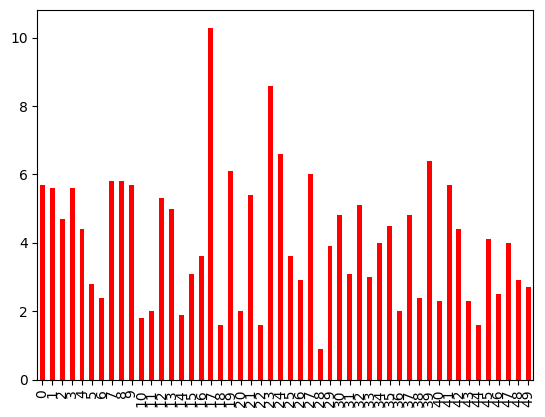

In [29]:
estado["Murder.Rate"].plot.bar(color="red")

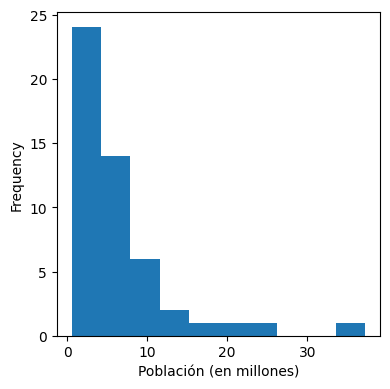

In [30]:
ax=(estado["Population"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Población (en millones)")
plt.tight_layout()
plt.show()

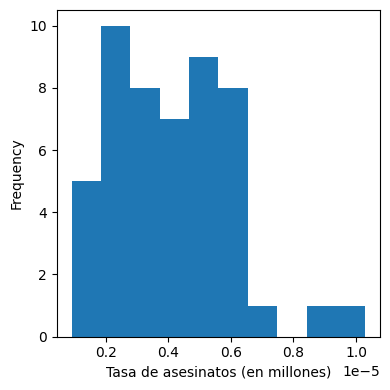

In [31]:
ax=(estado["Murder.Rate"]/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel("Tasa de asesinatos (en millones)")
plt.tight_layout()
plt.show()

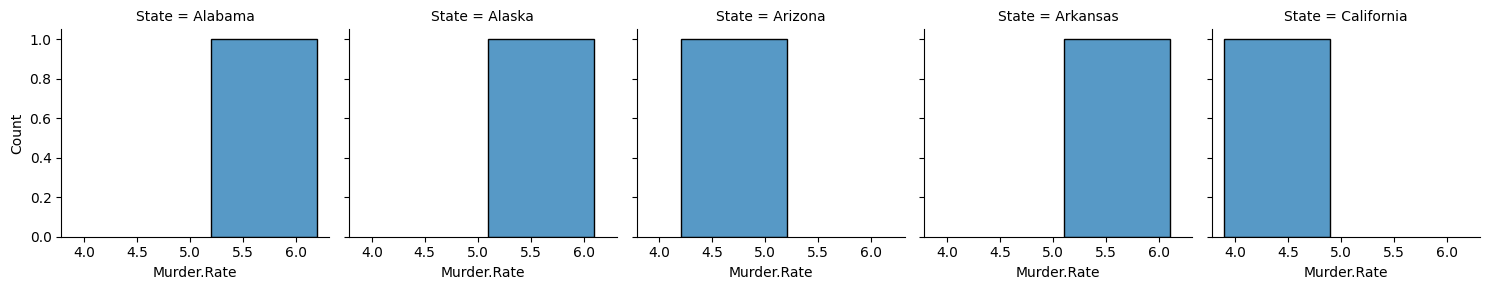

In [32]:
analisis=estado.head()
g=sns.FacetGrid(analisis, col="State")
g.map(sns.histplot, "Murder.Rate")

#ACTIVIDAD

In [33]:
!pip install statsmodels
!pip install wquantiles

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Cargar e inspeccionar los datos



In [47]:
data = sns.load_dataset('tips')  # Dataset 'tips' de Seaborn

# Ver primeros 5 registros:
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [48]:
# Ver los 5 últimos registros:
print(data.tail())

     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [49]:
# Ver 5 registros al azar:
print(data.sample(5))

     total_bill   tip     sex smoker   day    time  size
145        8.35  1.50  Female     No  Thur   Lunch     2
57        26.41  1.50  Female     No   Sat  Dinner     2
135        8.51  1.25  Female     No  Thur   Lunch     2
32        15.06  3.00  Female     No   Sat  Dinner     2
2         21.01  3.50    Male     No   Sun  Dinner     3


In [50]:
# Descripción estadística de las columnas numéricas (medidas de tendencia central)
print(data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# 2.1 Medidas de tendencia central

In [36]:
# Media de la columna 'total_bill'
mean_total_bill = data['total_bill'].mean()
print(f"Media total_bill: {mean_total_bill}")

Media total_bill: 19.78594262295082


In [37]:
# Mediana de la columna 'total_bill'
median_total_bill = data['total_bill'].median()
print(f"Mediana total_bill: {median_total_bill}")

Mediana total_bill: 17.795


In [38]:
# Moda de la columna 'total_bill'
mode_total_bill = data['total_bill'].mode()[0]
print(f"Moda total_bill: {mode_total_bill}")

Moda total_bill: 13.42


# 2.2 Comparar las distribuciones entre dos variables

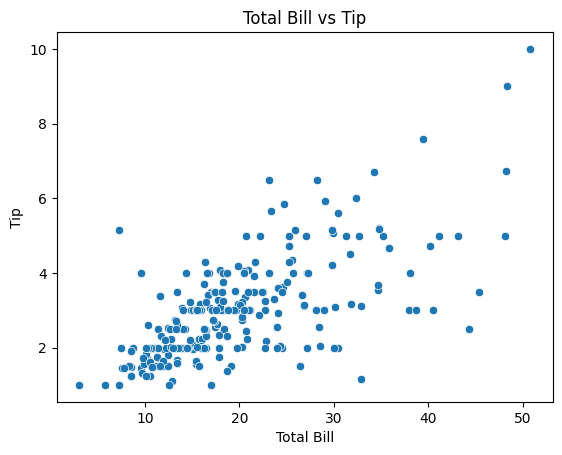

In [39]:
# Ejemplo de comparación entre 'total_bill' y 'tip' (propinas)
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

# 2.3 Visualización de histogramas

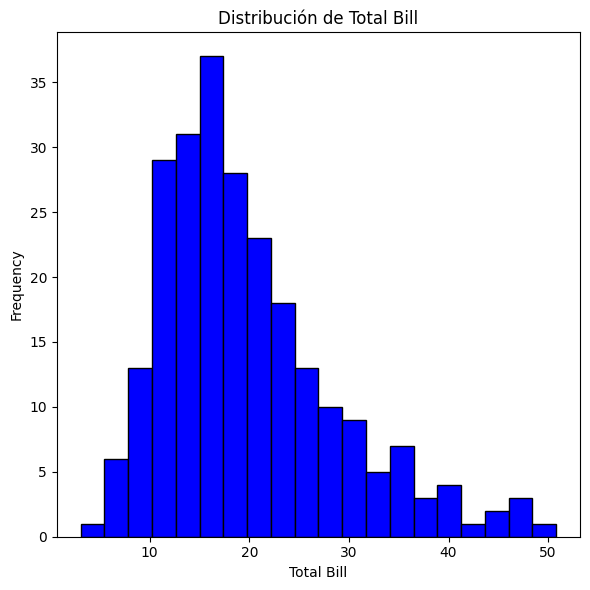

In [40]:
ax = data['total_bill'].plot.hist(figsize=(6, 6), bins=20, color='blue', edgecolor='black')
ax.set_xlabel("Total Bill")
ax.set_title("Distribución de Total Bill")
plt.tight_layout()
plt.show()

# 2.4 Visualización de boxplot (diagrama de caja)

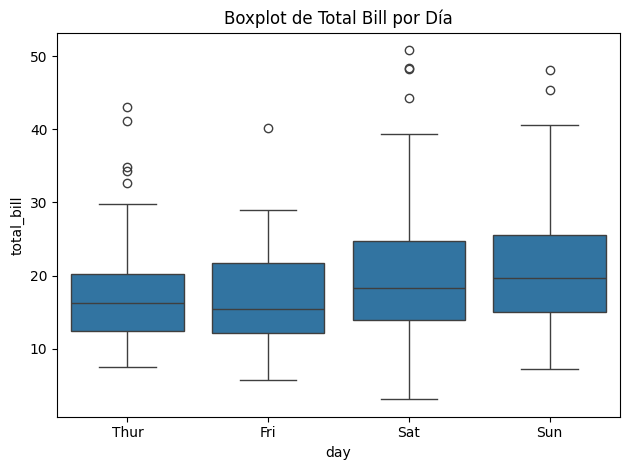

In [41]:
sns.boxplot(x='day', y='total_bill', data=data)
plt.title("Boxplot de Total Bill por Día")
plt.tight_layout()
plt.show()


# 2.5 Análisis de las tasas según género

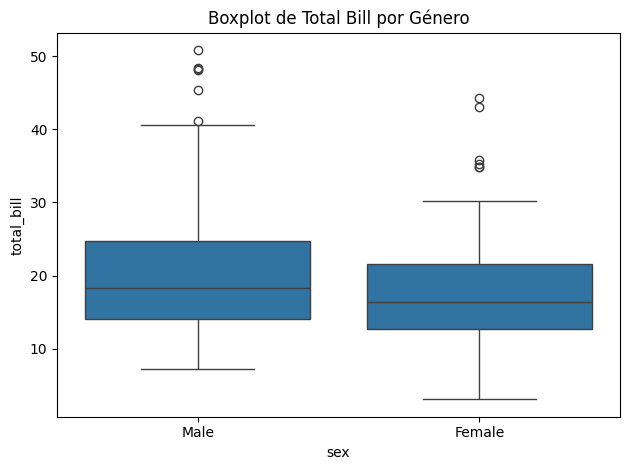

In [42]:
sns.boxplot(x="sex", y="total_bill", data=data)
plt.title("Boxplot de Total Bill por Género")
plt.tight_layout()
plt.show()

# 2.6 Gráfico FacetGrid para mostrar distribuciones de 'total_bill' según 'sex'

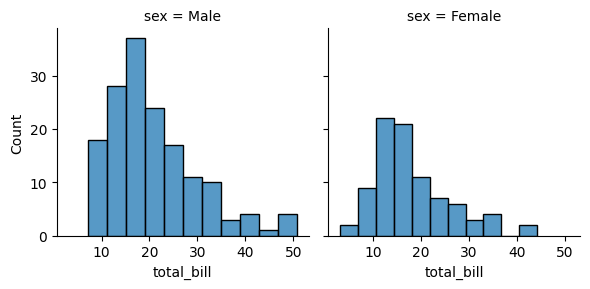

In [43]:
g = sns.FacetGrid(data, col="sex")
g.map(sns.histplot, "total_bill")
plt.tight_layout()
plt.show()

# 3. Medidas adicionales

In [44]:
# Calcular la varianza de la columna 'tip'
variance_tip = data['tip'].var()
print(f"Varianza de las propinas: {variance_tip}")

Varianza de las propinas: 1.9144546380624725


In [45]:
# Calcular la desviación estándar de 'tip'
std_dev_tip = data['tip'].std()
print(f"Desviación estándar de las propinas: {std_dev_tip}")

Desviación estándar de las propinas: 1.3836381890011826


# 4. Calcular el rango intercuartil (IQR)

In [46]:
IQR_total_bill = data['total_bill'].quantile(0.75) - data['total_bill'].quantile(0.25)
print(f"Rango Intercuartil (IQR) de total_bill: {IQR_total_bill}")

Rango Intercuartil (IQR) de total_bill: 10.779999999999998
